In [31]:
# From Kaggle
# https://www.kaggle.com/c/Kannada-MNIST/overview

# by sh

In [1]:
from __future__ import print_function

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import RMSprop,Adam
from tensorflow.keras import backend as K

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.patches as mpatches

In [3]:
# Supress warning and informational messages
import os

os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 

for dirname, _, filenames in os.walk('KannadaMNIST'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

KannadaMNIST\Dig-MNIST.csv
KannadaMNIST\sample_submission.csv
KannadaMNIST\test.csv
KannadaMNIST\train.csv


In [4]:
# Number of classes
num_classes = 10

In [5]:
train = pd.read_csv('KannadaMNIST/train.csv')
test = pd.read_csv('KannadaMNIST/test.csv')
y_train = train['label']
X = train.drop(['label'],axis=1)
del train
Id = test['id'] # save this for the submission
test = test.drop(['id'],axis=1) #

In [6]:
X.shape

(60000, 784)

In [7]:
test.shape

(5000, 784)

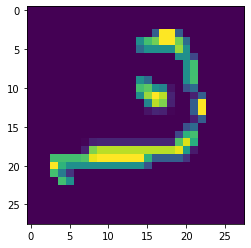

In [8]:
plt.imshow(X.values[2].reshape(28,28))

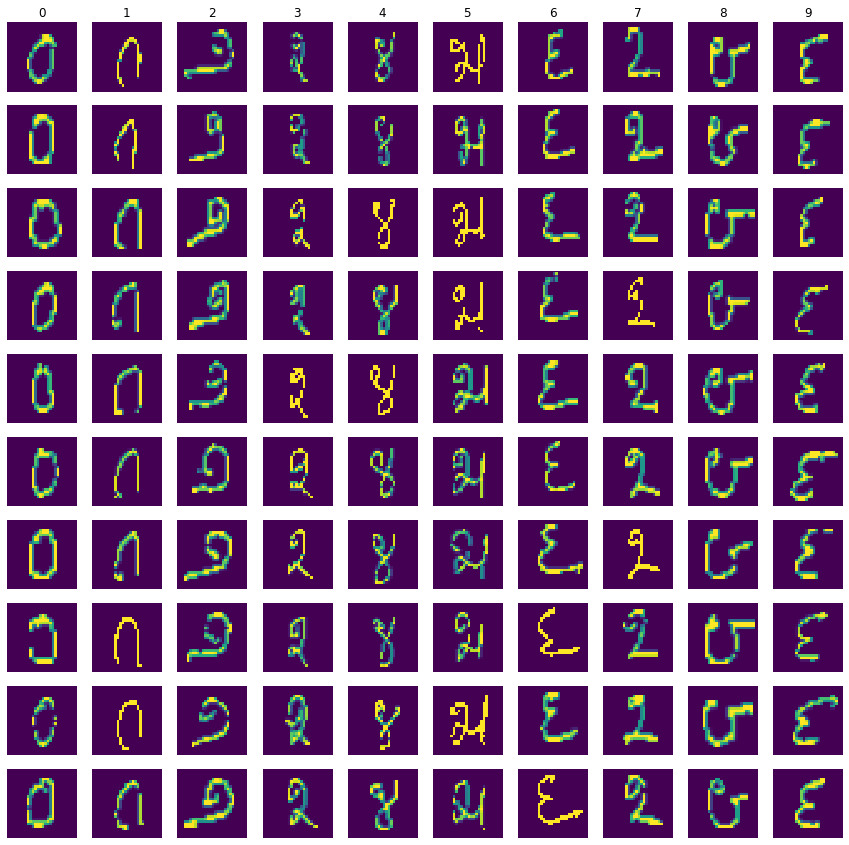

In [9]:
# code for this plot taken from https://www.kaggle.com/josephvm/kannada-with-pytorch

fig, ax = plt.subplots(nrows=10, ncols=10, figsize=(15,15))

# I know these for loops look weird, but this way num_i is only computed once for each class
for i in range(10): # Column by column
    num_i = X[y_train == i]
    ax[0][i].set_title(i)
    for j in range(10): # Row by row
        ax[j][i].axis('off')
        ax[j][i].imshow(num_i.iloc[j, :].to_numpy().astype(np.uint8).reshape(28, 28))

In [10]:
# re-shaping the data so that keras can use it
X = X.values.reshape(X.shape[0], 28, 28,1)
test = test.values.reshape(test.shape[0], 28, 28,1)
input_shape = (28, 28, 1)

# Scale the data
X = X / 255.0
test = test / 255.0

In [15]:
from tensorflow.keras.utils import to_categorical # convert to one-hot-encoding
# convert class vectors to binary class matrices.  One-hot encoding

y_train = to_categorical(y_train,num_classes)

In [16]:
epochs = 10 #40
initial_learningrate=2e-3
batch_size = 100

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X_train, X_val, y_train, y_val = train_test_split(X, y_train, test_size=0.1, random_state=1)

In [19]:
# Define the model
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
#model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

In [20]:
# Define the optimizer
optimizer = Adam(lr=0.001, beta_1=0.9, beta_2=0.999)

In [21]:
# Define compile to minimize categorical loss, and optimize to maximizing accuracy
model.compile(loss = "categorical_crossentropy",
              optimizer = optimizer,
              metrics = ['accuracy'])

In [22]:
# Train the model and test/validate the mode with the test data after each cycle (epoch) through the training data
# Return history of loss and accuracy for each epoch
hist = model.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_val, y_val))

Train on 54000 samples, validate on 6000 samples
Epoch 1/10
54000/54000 [==============================] - 66s 1ms/sample - loss: 0.1524 - accuracy: 0.9550 - val_loss: 0.0333 - val_accuracy: 0.9913
Epoch 2/10
54000/54000 [==============================] - 69s 1ms/sample - loss: 0.0462 - accuracy: 0.9862 - val_loss: 0.0244 - val_accuracy: 0.9938
Epoch 3/10
54000/54000 [==============================] - 69s 1ms/sample - loss: 0.0332 - accuracy: 0.9899 - val_loss: 0.0228 - val_accuracy: 0.9937
Epoch 4/10
54000/54000 [==============================] - 72s 1ms/sample - loss: 0.0273 - accuracy: 0.9912 - val_loss: 0.0215 - val_accuracy: 0.9948
Epoch 5/10
54000/54000 [==============================] - 70s 1ms/sample - loss: 0.0238 - accuracy: 0.9919 - val_loss: 0.0197 - val_accuracy: 0.9948
Epoch 6/10
54000/54000 [==============================] - 72s 1ms/sample - loss: 0.0210 - accuracy: 0.9932 - val_loss: 0.0214 - val_accuracy: 0.9945
Epoch 7/10
54000/54000 [==============================] -

In [24]:
# Evaluate the model with the test data to get the scores on "real" data.
score = model.evaluate(X_val, y_val, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.021349267750990445
Test accuracy: 0.99516666


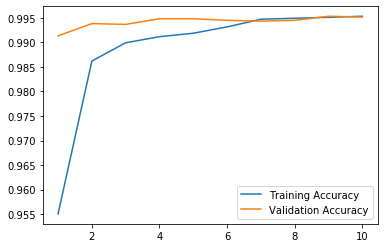

In [36]:
# Plot data to see relationships in training and validation data
epoch_list = list(range(1, len(hist.history['accuracy']) + 1))  # values for x axis [1, 2, ..., # of epochs]
plt.plot(epoch_list, hist.history['accuracy'], epoch_list, hist.history['val_accuracy'])
plt.legend(('Training Accuracy', 'Validation Accuracy'))
plt.show()

In [38]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 12, 12, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 9216)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               1179776   
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0

In [40]:
print('out of {} samples, we got {} incorrect'.format(len(X_train), round(len(X_train) - 
                                                                          hist.history['accuracy'][-1] * len(X_train))))

out of 54000 samples, we got 252.0 incorrect


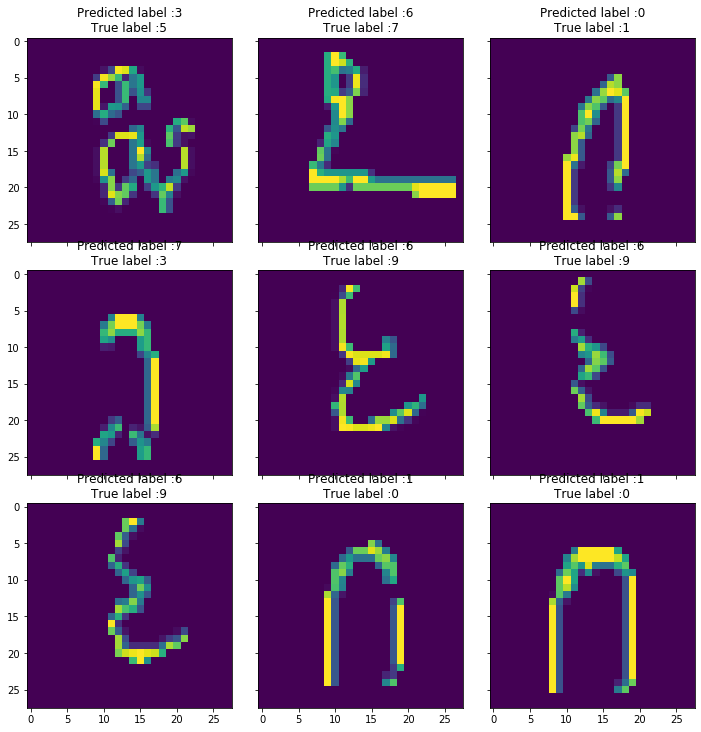

In [41]:
#code taken from here
#https://www.kaggle.com/jakelj/kannada-mnist-beginner-to

# Predict the values from the validation dataset
Y_pred = model.predict(X_val)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(y_val,axis = 1) 

# Errors are difference between predicted labels and true labels
errors = (Y_pred_classes - Y_true != 0)

Y_pred_classes_errors = Y_pred_classes[errors]
Y_pred_errors = Y_pred[errors]
Y_true_errors = Y_true[errors]
X_val_errors = X_val[errors]

def display_errors(errors_index,img_errors,pred_errors, obs_errors):
    """ This function shows 6 images with their predicted and real labels"""
    n = 0
    nrows = 3
    ncols = 3
    fig, ax = plt.subplots(nrows,ncols,sharex=True,sharey=True,figsize = (10,10))
    fig.tight_layout()
    for row in range(nrows):
        for col in range(ncols):
            error = errors_index[n]
            ax[row,col].imshow((img_errors[error]).reshape((28,28)))
            ax[row,col].set_title("Predicted label :{}\nTrue label :{}".format(pred_errors[error],obs_errors[error]))
            n += 1

# Probabilities of the wrong predicted numbers
Y_pred_errors_prob = np.max(Y_pred_errors,axis = 1)

# Predicted probabilities of the true values in the error set
true_prob_errors = np.diagonal(np.take(Y_pred_errors, Y_true_errors, axis=1))

# Difference between the probability of the predicted label and the true label
delta_pred_true_errors = Y_pred_errors_prob - true_prob_errors

# Sorted list of the delta prob errors
sorted_dela_errors = np.argsort(delta_pred_true_errors)

# Top 6 errors 
most_important_errors = sorted_dela_errors[-18:-9]

# Show the top 6 errors
display_errors(most_important_errors, X_val_errors, Y_pred_classes_errors, Y_true_errors)

In [42]:
predictions = model.predict(test)

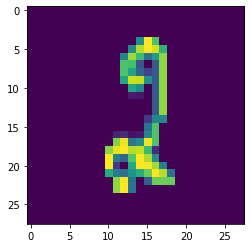

In [43]:
plt.imshow(test[0].reshape(28,28))

In [44]:
predictions[0] # 

array([1.1374008e-12, 9.0099837e-16, 1.1894132e-11, 1.0000000e+00,
       5.8830127e-13, 8.7211868e-13, 1.9977726e-13, 4.2851092e-09,
       7.8383961e-19, 7.8369209e-14], dtype=float32)

In [45]:
predictions = predictions.argmax(axis = -1)
predictions

array([3, 0, 2, ..., 1, 6, 3], dtype=int64)

In [46]:
submission = pd.DataFrame({ 'id': Id,
                            'label': predictions })
submission.to_csv(path_or_buf ="submission.csv", index=False)